In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('CrimesOnWomenData.csv')

In [3]:
# K&A-kidnap and assault, DD-dowry death, AoW-assault against women, AoM-assault against modesty of women, WT-women trafficking
df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [4]:
df.dtypes

Unnamed: 0     int64
State         object
Year           int64
Rape           int64
K&A            int64
DD             int64
AoW            int64
AoM            int64
DV             int64
WT             int64
dtype: object

In [5]:
df.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [8]:
df= df.loc[:, df.columns[1:]]

In [9]:
#top 5 state from the dataset with most number of crimes against women
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [10]:
# 5 states from dataset with least number of crimes against women
df.tail()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0
735,Puducherry,2021,2,0,2,31,3,12,0


In [11]:
#checking for null values
df.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

In [12]:
# Merge columns with similar crimes
df['viloence_against_women']= df['AoW']+df['AoM']+df['DV']
df['crime_involving_force']=df['K&A']+df['WT']

In [13]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,viloence_against_women,crime_involving_force
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,11606,772
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,92,55
2,ASSAM,2001,817,1070,59,850,4,1248,0,2102,1070
3,BIHAR,2001,888,518,859,562,21,1558,83,2141,601
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,2764,171


In [14]:
#dropping columns which are not required
df.drop(columns=['K&A','AoM','AoW','DV','WT'],inplace=True)

In [15]:
df.head()

,State,Year,Rape,DD,viloence_against_women,crime_involving_force
0,ANDHRA PRADESH,2001,871,420,11606,772
1,ARUNACHAL PRADESH,2001,33,0,92,55
2,ASSAM,2001,817,59,2102,1070
3,BIHAR,2001,888,859,2141,601
4,CHHATTISGARH,2001,959,70,2764,171


In [42]:
df.State.unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA',
       'D&N HAVELI', 'DELHI UT'], dtype=object)

In [23]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [24]:
df['State']= df['State'].str.upper()

In [25]:
df.tail()

,State,Year,Rape,DD,viloence_against_women,crime_involving_force
731,D&N HAVELI,2021,1250,141,7216,4087
732,DAMAN & DIU,2021,315,16,2362,905
733,DELHI UT,2021,2,0,15,1
734,LAKSHADWEEP,2021,0,0,5,0
735,PUDUCHERRY,2021,2,2,46,0


In [26]:
df.rename(columns={'Rape':'sexual_crimes'},inplace=True)

In [27]:
df.rename(columns={'DD':'dowry_deaths'},inplace=True)

In [28]:
df.head(2)

,State,Year,sexual_crimes,dowry_deaths,viloence_against_women,crime_involving_force
0,ANDHRA PRADESH,2001,871,420,11606,772
1,ARUNACHAL PRADESH,2001,33,0,92,55


In [31]:
yearly_state_violence= df.groupby(['Year','State'])['viloence_against_women'].sum().reset_index()
yearly_state_violence

,Year,State,viloence_against_women
0,2001,A & N ISLANDS,29
1,2001,ANDHRA PRADESH,11606
2,2001,ARUNACHAL PRADESH,92
3,2001,ASSAM,2102
4,2001,BIHAR,2141
...,...,...,...
731,2021,TELANGANA,450
732,2021,TRIPURA,27795
733,2021,UTTAR PRADESH,1187
734,2021,UTTARAKHAND,22861


In [35]:
#finding state with highest violence for each year
max_violence_state= yearly_state_violence.loc[yearly_state_violence.groupby('Year')['viloence_against_women'].idxmax()]
max_violence_state.head()

,Year,State,viloence_against_women
31,2001,UTTAR PRADESH,12810
35,2002,ANDHRA PRADESH,12841
69,2003,ANDHRA PRADESH,14581
103,2004,ANDHRA PRADESH,14515
137,2005,ANDHRA PRADESH,14799


In [36]:
print(max_violence_state[['Year','State','viloence_against_women']])

     Year           State  viloence_against_women
31   2001   UTTAR PRADESH                   12810
35   2002  ANDHRA PRADESH                   12841
69   2003  ANDHRA PRADESH                   14581
103  2004  ANDHRA PRADESH                   14515
137  2005  ANDHRA PRADESH                   14799
171  2006  ANDHRA PRADESH                   16109
205  2007  ANDHRA PRADESH                   19057
239  2008  ANDHRA PRADESH                   18587
273  2009  ANDHRA PRADESH                   19964
307  2010  ANDHRA PRADESH                   21276
375  2011     WEST BENGAL                   19972
411  2012     WEST BENGAL                   23766
413  2013  ANDHRA PRADESH                   26716
483  2014     WEST BENGAL                   29993
519  2015     WEST BENGAL                   25906
553  2016   UTTAR PRADESH                   31913
589  2017   UTTAR PRADESH                   25351
625  2018   UTTAR PRADESH                   26805
661  2019   UTTAR PRADESH                   30334


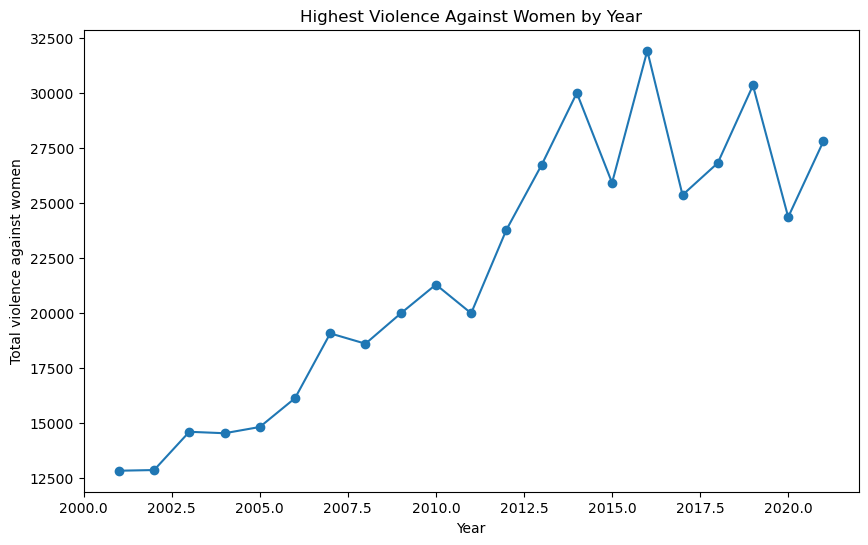

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(max_violence_state['Year'],
max_violence_state['viloence_against_women'], marker='o')
#adding title
plt.title('Highest Violence Against Women by Year')
plt.xlabel('Year')
plt.ylabel('Total violence against women')

plt.show()

In [40]:
#State wise sexual crimes each year
yearly_state_sexualcrimes= df.groupby(['Year','State'])['sexual_crimes'].sum().reset_index()
yearly_state_sexualcrimes.head(2)

,Year,State,sexual_crimes
0,2001,A & N ISLANDS,3
1,2001,ANDHRA PRADESH,871


In [41]:
#finding state with highest sexual crimes each year
high_sexualcrime_states= yearly_state_sexualcrimes.loc[yearly_state_sexualcrimes.groupby('Year')['sexual_crimes'].idxmax()]
high_sexualcrime_states.head()

,Year,State,sexual_crimes
18,2001,MADHYA PRADESH,2851
52,2002,MADHYA PRADESH,2891
86,2003,MADHYA PRADESH,2738
120,2004,MADHYA PRADESH,2875
154,2005,MADHYA PRADESH,2921


In [43]:
print(high_sexualcrime_states[['Year','State','sexual_crimes']])

     Year           State  sexual_crimes
18   2001  MADHYA PRADESH           2851
52   2002  MADHYA PRADESH           2891
86   2003  MADHYA PRADESH           2738
120  2004  MADHYA PRADESH           2875
154  2005  MADHYA PRADESH           2921
188  2006  MADHYA PRADESH           2900
222  2007  MADHYA PRADESH           3010
256  2008  MADHYA PRADESH           2937
290  2009  MADHYA PRADESH           2998
324  2010  MADHYA PRADESH           3135
359  2011  MADHYA PRADESH           3406
395  2012  MADHYA PRADESH           3425
431  2013  MADHYA PRADESH           4335
467  2014  MADHYA PRADESH           5076
503  2015  MADHYA PRADESH           4391
539  2016  MADHYA PRADESH           4882
575  2017  MADHYA PRADESH           5562
611  2018  MADHYA PRADESH           5433
656  2019       RAJASTHAN           5997
691  2020          PUNJAB           5310
727  2021          PUNJAB           6337


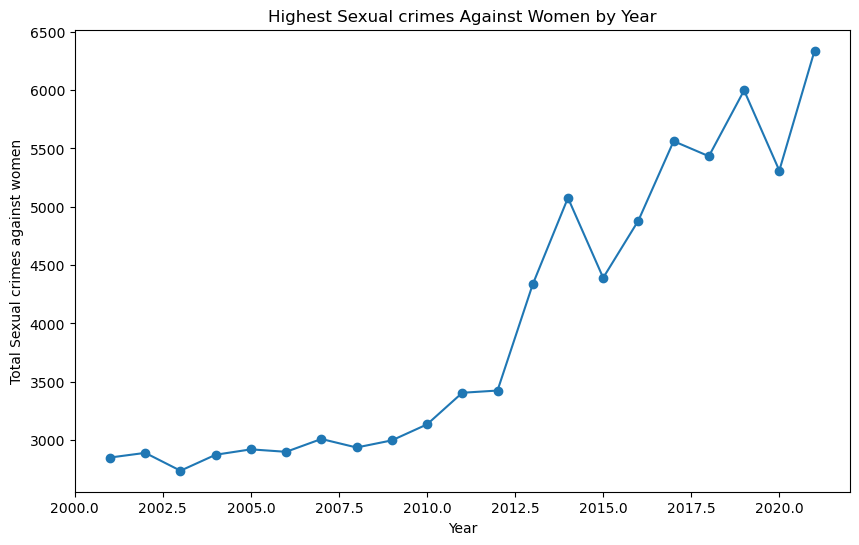

In [49]:
plt.figure(figsize=(10,6))
plt.plot(high_sexualcrime_states['Year'],
high_sexualcrime_states['sexual_crimes'], marker='o')
#adding title
plt.title('Highest Sexual crimes Against Women by Year')
plt.xlabel('Year')
plt.ylabel('Total Sexual crimes against women')

plt.show()

In [51]:
#state wise dowry deaths each year
yearly_state_dowrydeaths=df.groupby(['Year','State'])['dowry_deaths'].sum().reset_index()
yearly_state_dowrydeaths.head()

,Year,State,dowry_deaths
0,2001,A & N ISLANDS,0
1,2001,ANDHRA PRADESH,420
2,2001,ARUNACHAL PRADESH,0
3,2001,ASSAM,59
4,2001,BIHAR,859


In [52]:
high_dowrydeath_states= yearly_state_dowrydeaths.loc[yearly_state_dowrydeaths.groupby('Year')['dowry_deaths'].idxmax()]
high_dowrydeath_states.head()

,Year,State,dowry_deaths
31,2001,UTTAR PRADESH,2211
65,2002,UTTAR PRADESH,1893
99,2003,UTTAR PRADESH,1322
133,2004,UTTAR PRADESH,1708
167,2005,UTTAR PRADESH,1564


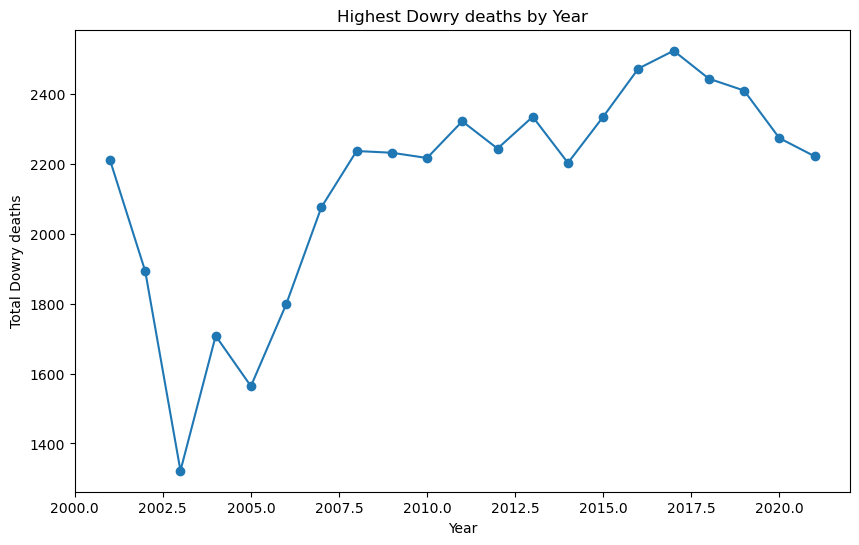

In [54]:
plt.figure(figsize=(10,6))
plt.plot(high_dowrydeath_states['Year'],
high_dowrydeath_states['dowry_deaths'], marker='o')
#adding title
plt.title('Highest Dowry deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Dowry deaths')

plt.show()

In [55]:
#state wise dowry deaths each year
yearly_state_crimewforce=df.groupby(['Year','State'])['crime_involving_force'].sum().reset_index()
high_crimewforce_states= yearly_state_crimewforce.loc[yearly_state_crimewforce.groupby('Year')['crime_involving_force'].idxmax()]
high_crimewforce_states.head()

,Year,State,crime_involving_force
31,2001,UTTAR PRADESH,2879
65,2002,UTTAR PRADESH,2298
95,2003,RAJASTHAN,1751
133,2004,UTTAR PRADESH,2327
167,2005,UTTAR PRADESH,2256


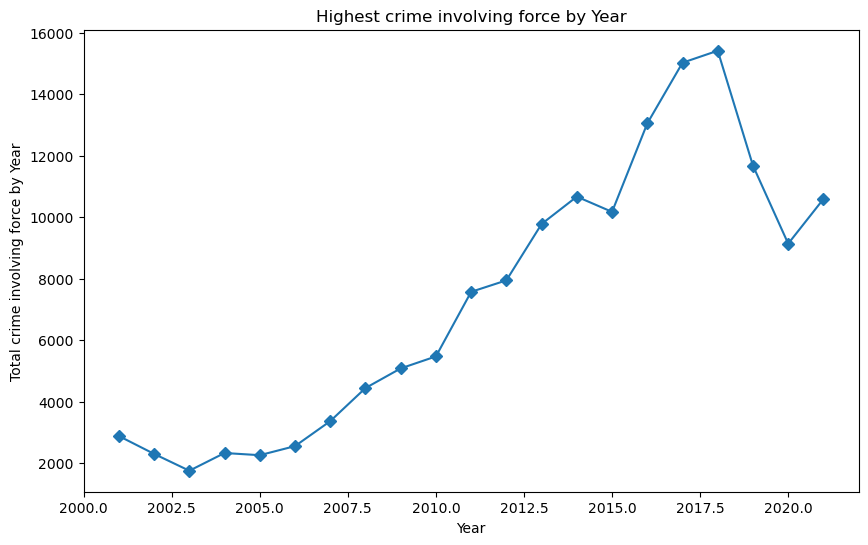

In [56]:
plt.figure(figsize=(10,6))
plt.plot(high_crimewforce_states['Year'],
high_crimewforce_states['crime_involving_force'], marker='D')
#adding title
plt.title('Highest crime involving force by Year')
plt.xlabel('Year')
plt.ylabel('Total crime involving force by Year')

plt.show()